# Project Background

The unexpected presence of the coronavirus worldwide has disrupted the daily routines of everyone. Nowadays, urban residents no longer spend their leisure time outside, such as going to cafes and malls. They are more often at home, spending their time reading books. This has prompted startup companies to develop new applications for book enthusiasts.


You have been given a database from one of the companies competing in this industry. The database contains information about books, publishers, authors, as well as customer ratings and reviews for related books. This information will be used to create pricing offers for a new product.

# Project Goals

* Identifying books with the potential to attract a large number of readers.
* Understanding the preferences of readers, such as the types of books they enjoy.
* Identifying books with high ratings and positive reviews.

# Data Chart

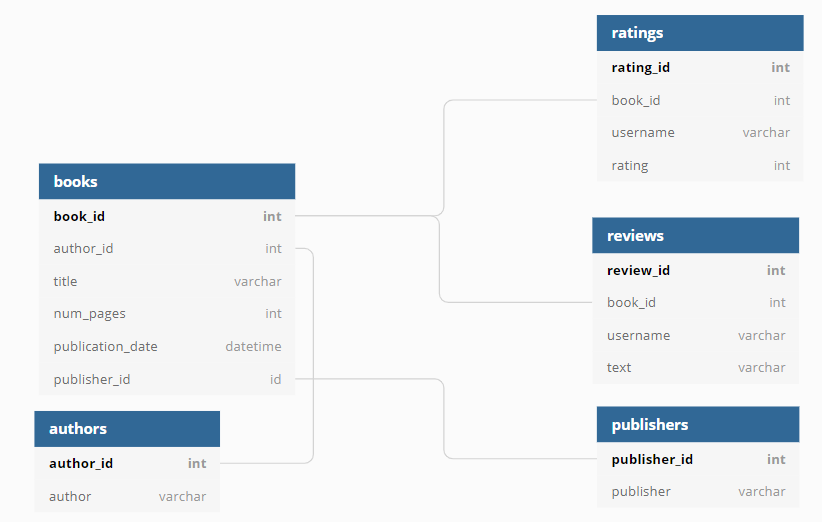

# Connect to Database

In [1]:
# impor library yang diperlukan
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',         # nama pengguna
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # kata sandi
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # port koneksi
             'db': 'data-analyst-final-project-db'}          # nama database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

# Checking Table Name

In [2]:
query = """
SELECT * 
FROM pg_catalog.pg_tables;
"""

In [3]:
df = pd.io.sql.read_sql(query, con = engine)

In [4]:
df[df['schemaname'] == 'public']

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
66,public,author,praktikum_student,None,True,False,False,False
67,public,second,praktikum_student,None,False,False,False,False
68,public,second_b,praktikum_student,None,False,False,False,False
69,public,advertisment_costs,praktikum_admin,None,True,False,False,False
70,public,authors,praktikum_admin,None,True,False,True,False
71,public,books,praktikum_admin,None,True,False,True,False
72,public,orders,praktikum_admin,None,True,False,False,False
73,public,publishers,praktikum_admin,None,True,False,True,False
74,public,ratings,praktikum_admin,None,True,False,True,False
75,public,reviews,praktikum_admin,None,True,False,True,False


# Explore Table

In [5]:
query = """SELECT * FROM public.books;"""

In [6]:
df_books = pd.io.sql.read_sql(query, con = engine)

In [7]:
df_books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [8]:
query = """SELECT * FROM public.authors;"""

In [9]:
df_authors= pd.io.sql.read_sql(query, con = engine)

In [10]:
df_authors

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


In [11]:
query = """SELECT * FROM public.publishers;"""

In [12]:
df_publishers = pd.io.sql.read_sql(query, con = engine)

In [13]:
df_publishers

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


In [14]:
query = """SELECT * FROM public.ratings;"""

In [15]:
df_ratings = pd.io.sql.read_sql(query, con = engine)

In [16]:
df_ratings

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


In [17]:
query = """SELECT * FROM public.reviews;"""

In [18]:
df_reviews = pd.io.sql.read_sql(query, con = engine)

In [19]:
df_reviews

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


## Calculating the number of books released after January 1, 2000.

In [20]:
query1 = """SELECT COUNT(public.books.book_id)
                FROM public.books
                    WHERE publication_date > '2000-01-01' """

In [21]:
pd.io.sql.read_sql(query1, con = engine)

,count
0,819


The number of books released after January 1, 2000 is 819 books.

## Calculating the total user reviews and average rating for each book.

In [22]:
query2_1 = """SELECT public.books.title, COUNT(DISTINCT public.reviews.username ) AS username_count, AVG(rating) AS average_rating
                FROM public.books
                    JOIN public.reviews ON public.reviews.book_id = public.books.book_id
                    JOIN public.ratings ON public.ratings.book_id = public.books.book_id
                        GROUP BY public.books.title
                            ORDER BY username_count DESC
                                LIMIT 20"""

In [23]:
pd.io.sql.read_sql(query2_1, con = engine)

,title,username_count,average_rating
0,Memoirs of a Geisha,8,4.138462
1,Twilight (Twilight #1),7,3.662500
2,The Alchemist,6,3.789474
3,The Glass Castle,6,4.206897
4,The Road,6,3.772727
5,The Curious Incident of the Dog in the Night-Time,6,4.081081
6,The Book Thief,6,4.264151
7,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
8,The Da Vinci Code (Robert Langdon #2),6,3.830508
9,The Giver (The Giver #1),6,3.750000


We can see the most reviews from users are for the book titled 'Memoirs of a Geisha', followed by 'Twilight'. As for the ratings, these reviewed books also have relatively high ratings, with an average score of 4.

## Identifying the publisher that has published the highest number of books, with a page count of more than 50.

In [24]:
df_publishers

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


In [25]:
df_books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [26]:
query3 = """SELECT public.books.publisher_id, public.publishers.publisher,COUNT(public.books.publisher_id) AS book_count
            FROM public.books 
                JOIN public.publishers ON public.publishers.publisher_id = public.books.publisher_id
                    WHERE public.books.num_pages > 50
                        GROUP BY public.books.publisher_id, public.publishers.publisher 
                            ORDER BY book_count DESC;
                            """

In [27]:
pd.io.sql.read_sql(query3, con = engine)

,publisher_id,publisher,book_count
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
...,...,...,...
329,148,Harvard Business Review Press,1
330,302,Tyndale House Publishers,1
331,66,Corgi Childrens,1
332,230,Pocket Books / Simon & Schuster Inc.,1


We can see that Penguin Books is the publisher with the highest number of books, with a total of 42

## Identifying authors with the highest average book ratings: find books with a minimum rating of 50.

In [28]:
df_authors

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


In [29]:
df_ratings

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


In [30]:
df_books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [31]:
query4 = """SELECT public.authors.author, SUM(public.ratings.rating) AS sum_rating , AVG(public.ratings.rating) AS avg_rating
                FROM public.books
                    JOIN public.authors ON public.authors.author_id = public.books.author_id
                    JOIN public.ratings ON public.ratings.book_id = public.books.book_id
                        GROUP BY public.authors.author
                            HAVING SUM(public.ratings.rating) > 50
                                ORDER BY sum_rating DESC
                                """

In [32]:
pd.io.sql.read_sql(query4, con = engine)

,author,sum_rating,avg_rating
0,J.K. Rowling/Mary GrandPré,1338,4.288462
1,J.R.R. Tolkien,704,4.240964
2,Stephenie Meyer,586,3.662500
3,Dan Brown,535,3.741259
4,Nicholas Sparks,431,3.882883
...,...,...,...
103,Gail Carson Levine,53,4.076923
104,Haruki Murakami/Philip Gabriel,53,3.785714
105,Shel Silverstein,53,4.076923
106,Art Spiegelman,52,4.333333


In [33]:
query4 = """SELECT public.authors.author, SUM(public.ratings.rating) AS sum_rating , AVG(public.ratings.rating) AS avg_rating
                FROM public.books
                    JOIN public.authors ON public.authors.author_id = public.books.author_id
                    JOIN public.ratings ON public.ratings.book_id = public.books.book_id
                        GROUP BY public.authors.author
                            HAVING SUM(public.ratings.rating) > 50
                                ORDER BY avg_rating DESC
                                """

In [34]:
pd.io.sql.read_sql(query4, con = engine)

,author,sum_rating,avg_rating
0,Lisa See,59,4.538462
1,Kim Harrison,58,4.461538
2,Margaret Mitchell,155,4.428571
3,George R.R. Martin,101,4.391304
4,Art Spiegelman,52,4.333333
...,...,...,...
103,Lauren Weisberger,98,3.379310
104,Cornelia Funke/Anthea Bell,54,3.375000
105,Bram Stoker/Nina Auerbach/David J. Skal,89,3.296296
106,Kim Edwards,62,3.263158


From the table above, it can be seen that JK Rowling ranks first in the number of ratings, and Lisa See ranks first for the highest average.

In [35]:
query4 = """SELECT public.authors.author, public.ratings.rating, AVG(public.ratings.rating) AS avg_rating
                FROM public.books
                    JOIN public.authors ON public.authors.author_id = public.books.author_id
                    JOIN public.ratings ON public.ratings.book_id = public.books.book_id
                        GROUP BY public.authors.author, public.ratings.rating
                            HAVING public.ratings.rating = 5
                                ORDER BY public.ratings.rating DESC
                                    LIMIT 10"""

In [36]:
pd.io.sql.read_sql(query4, con = engine)

,author,rating,avg_rating
0,Neil Gaiman/Shawn McManus/Colleen Doran/Bryan ...,5,5.0
1,Margaret Mitchell,5,5.0
2,Philip K. Dick,5,5.0
3,Dan Millman,5,5.0
4,Ivan Turgenev/George Reavy/Jane Costlow,5,5.0
5,Leo Tolstoy/David Magarshack/Priscilla Meyer,5,5.0
6,Ellen Raskin,5,5.0
7,Mark Haddon,5,5.0
8,Dan Simmons,5,5.0
9,Laura Ingalls Wilder/Garth Williams,5,5.0


In [37]:
query = '''
SELECT authors.author, AVG(ratings.rating), COUNT(ratings.book_id)
FROM authors
JOIN books ON authors.author_id = books.author_id
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY authors.author
HAVING COUNT(ratings.book_id) > 50
ORDER BY AVG(ratings.rating) DESC
LIMIT 5
'''

pd.io.sql.read_sql(query, con = engine)

,author,avg,count
0,J.K. Rowling/Mary GrandPré,4.288462,312
1,Agatha Christie,4.283019,53
2,Markus Zusak/Cao Xuân Việt Khương,4.264151,53
3,J.R.R. Tolkien,4.240964,166
4,Roald Dahl/Quentin Blake,4.209677,62


## Calculating the average text review length among users who rated more than 50 books.

In [38]:
df_reviews

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


In [39]:
df_ratings

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


In [40]:
query5 = """SELECT AVG(CHAR_LENGTH(r.text)) AS average_text_length
                FROM (
                        SELECT username, COUNT(DISTINCT book_id) AS book_count
                            FROM public.ratings
                                GROUP BY username
                                    HAVING COUNT(DISTINCT book_id) > 50
                                                                        ) AS active_users
                JOIN public.reviews AS r ON active_users.username = r.username;
                """

In [41]:
df = pd.io.sql.read_sql(query5, con = engine)
df

,average_text_length
0,87.684932


In [42]:
query = '''SELECT
             SUM(Sub.count_reviews)/COUNT(Sub.count_reviews) AS count
            FROM( SELECT reviews.username, count(reviews.username) as count_reviews
                    FROM reviews
                        WHERE reviews.username in (SELECT ratings.username
                                                        FROM ratings
                                                            GROUP BY ratings.username
                                                                HAVING count(ratings.rating_id) > 50
                    )
                            GROUP BY username) as Sub

'''

result = pd.io.sql.read_sql(query, con = engine)
display(result)

,count
0,24.333333


# Preliminary Conclusion

So from the results of our tasks, there are several points that we can conclude:

1. Books published after the year 2000 have a higher frequency compared to those before 2000, with a total of 819 out of 1000 books, meaning 80% are dominated by books from 2000 onwards. It's advisable to offer books published after 2000 rather than before 2000, as they have the potential to attract more readers.

2. Some books are frequently read by users, even dozens of times. We need to pay attention to these favorite books, as users who provide text reviews tend to enjoy reading books.

3. We should focus on publishers that attract more readers, such as Penguin Books, Vintage, and others. Publishers play a crucial role in attracting readers.

4. Similarly, for authors, we need to select popular authors that are favored by readers, like JK Rowling, JRR Tolkien, etc. However, we also need to consider authors who may not have many ratings but have good average ratings. They could be given more exposure as there is an opportunity there, such as Lisa See, Kim Harrison, and others.

5. We need to pay attention to reviews from users who frequently provide reviews, as this significantly impacts business progress. There are six people who have reviewed more than 50 books, and their reviews should be considered